# Principal Component analysis

Up until now, we have been looking in depth at supervised learning estimators: those estimators that predict labels based on labeled training data. Here we begin looking at several unsupervised estimators, which can highlight interesting aspects of the data without reference to any known labels.

In this section, we explore what is perhaps one of the most broadly used of unsupervised algorithms, principal component analysis (PCA). PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more. After a brief conceptual discussion of the PCA algorithm, we will see a couple examples of these further applications.

We begin with the standard imports:


In [8]:
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

## Introducing Principal Component Analysis

Principal component analysis is afast and flexible unsupervised method for dimensionaltiy reduction in data, which we saw briefly. its behavior is easiest to visualize by looking at a two-dimensional dataset.

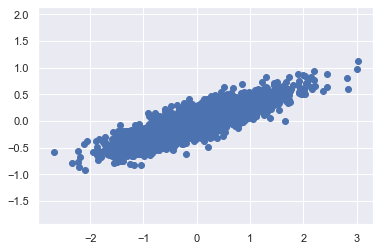

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 2000)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

By eye, its is clear that there is a nearly linear relationship between the x and y variables. But the problem setting here is slightly different: rather tahn attempting to *predict* the y values from the x values, the unsupervised learning problem attempts to learn about the *relationship* between the x and y values.

In principal component analysis, this relationship is quantified by finding a list of the *princiapl axes* the data, and using those axes to describe the dataset. Using Scikit-Learn's `PCA` estimator, we ca ncompute this as follows:

In [3]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

The fit learns some quantities from the data, most importantly the "components" and "explained variance":

In [4]:
print(pca.components_)

[[ 0.95158339  0.30739071]
 [ 0.30739071 -0.95158339]]


In [5]:
print(pca.explained_variance_)

[0.74738722 0.02106855]


To see what these numbers mean, let's visualize them as vectors over the input data, using the "components" to defien the direction of the vector, and the "explanied variance" to define the squared-length of the vector:

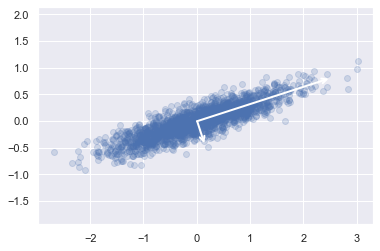

In [6]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)                

# plot data 
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)

plt.axis('equal');

These vectors represent the *principal axes* of the data, and the length of the vector is an indication of ho "important" that axis is in describing the distribution of the data -- more precisely, it is measure of the variance of the data when projected onto that axis. The projection of each data proint onto hte principal axes are the "principal components" of the data.

If we plot these principal components beside the original data, we see the plots shown here:

![pca_comparison](https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.09-PCA-rotation.png)

This transformation from data axes to principal axes is an *affine transformation*, which basically means it iscomposed ofa translation, rotation, and uniform scaling.

While this algorithm to find principal components may seem like just a mathematical curiosity, it turns out to have very far-reaching applications in the world of machine learning and data exploration.

### PCA for visualizatino: Hand-written digits 

The usefulness of the dimensionality reduction may not be entirely apparent in only two dimensions, but becomes much more clear when looking ath high-dimensional data. To see this, let's take a quick look at hte application of PCA to the digits.

We start by loading the data:

In [7]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Recall that the data consist of 8x8 pixel images, meaning that htey are 64-dimensional. To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions, say two:

In [8]:
pca = PCA(2)
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


We can now plot the first two principal componentes of each point to learn about the data:

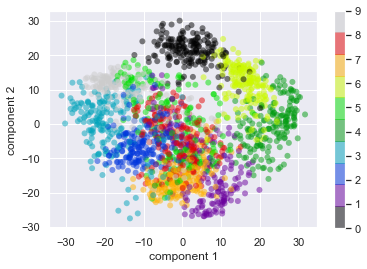

In [9]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()


Recall what these compoments mean: the full data is a 64-dimensional point cloud, and these points are the projection of each data point along hte directions with the largest variance. Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits in two dimensions, and ahve done this in an unsupervised manner --hat is, without reference to the labels.

### What do the componets mean?
WE can go a bit further here, and being to ask what the reduced dimensions *mean*. This meaning can be understood in terms of combinations of basis vectors. For example, each image in the training set is defined by a collection of 56 pixel values, which we will call the vector **x**: $$x=[x_1, x_2, x_3, ... , x_64]$$

One way se can thin about this is in terms of a pixel basis. That is, to construct the image , we multiply weach element of the vector by the pixel it describes, and then add the resutls together to build the image: $$iamge(x) = x_1 * (pixel 1) + x_2 *(pixel 2) + x_3 * (pixel 3) ... x_{64} * (pixel 64)$$

One way to we might imagine reducing the dimension of this data is to zero out all but a few of these basis vectors. For exmple, if we use only the first eight pixels, we get an eigth-dimensional proejction of the data, but it is not very reflective of the while image: we've htrown out nearly 90% of the pixels!

![pixels](https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.09-digits-pixel-components.png)

The upper row of panels shows the individual pixels, and the lower row shows the cumulative contribution of these pixels to the construction of the image. Using only eight of the pixel-basis components, we can only construct a small portion of the 64-pixel image. Were we to continue this sequence and use all 64 pixels, we would recover the original image.

But the pixel-wise representation is not the only choice of basis. We can also use other basis functions, which each contain some pre-defined contribution from each pixel, and write something like:
$$ iamge(x) = mean + x_1 * (basis 1) + x_2 * (basis 2) + x_3 * (basis 3) ... $$


PCA can be thought of as a process of choosing optimal basis functions, such that adding together hust the first few of them is enought to suitably reconstruct the buil of the elements in the dataset. The princpal componentes, which act as the low-dimensioanl representation of our data, are simply the coefficients that multiply each of the elements in this series. This figure shows a similar depiction of reconstructing this digit using the mean plus the first eight PCA basis functions:

![basis_function](https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.09-digits-pca-components.png)

Unlike the pixel basis, the PCA basis allows us to recover the salient features of the input image with just a mean plus eight components! The amount of each pixel in each component is the corollary of the orientation of the vector in our two-dimensional example. This is the sense in which PCA provides a low-dimensional representation of the data: it discovers a set of basis functions that are more efficient than the native pixel-basis of the input data.


### choosing the number of components

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. This can be determined by looiing at the cumulative *explained variance ratio* as a function of the number of components:

Text(0, 0.5, 'cumulative explained variance')

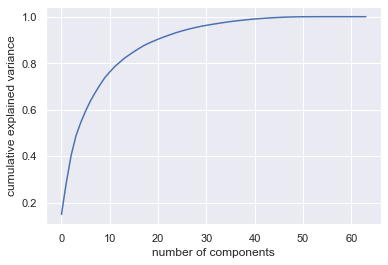

In [10]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

This curve quantifies how much of the total, 64-dimensional variance is contained within the first $N$ components. For example, we see that with the digits the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.

Here we see taht our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to reain 90% of the variance. Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

## PCA as Noise Filtering

PCA can also be used as a filtering approach for noisy data. The idea is this: any components with variance much larger than the effect of the nosie should be relatively unaffected by the noise. So if you reconstruct the data using just the largest subset of principal components you should be preferentially keeping the signal and throwing out hte noise.

Let's see how this looks with the digits data. First we will plot several of the input noise-free data:

<ipython-input-11-55e90b6ff215>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.imshow(data[i].reshape(8, 8),


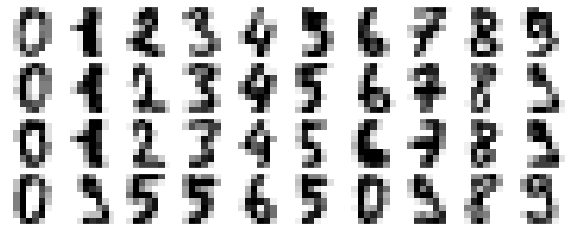

In [11]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks': [], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
        cmap='binary', Interpolation='nearest',
        clim=(0, 16))

plot_digits(digits.data)

Now lets add some random noise to create a noisy dataset, and re-plot it:

<ipython-input-11-55e90b6ff215>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.imshow(data[i].reshape(8, 8),


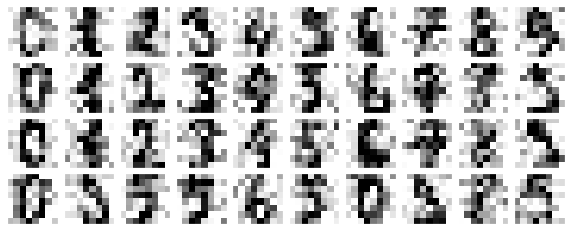

In [13]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

## Example: Eigenfaces

Earlier we explored an example of using a PCA projection as a feature seletor for afacial recognition with a support vector machine. Here we will take a look back and explore abit more of what wen into that. Recall that we were using the Labeled FAces in the Wild dataset made available through Scikit-Learn:

In [2]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


Let's take a look at the principal axes taht span this dataset. Becasue this is a large dataset, we will use `RandomizedPCA` -it contains a randomzied method to approximate first $N$ princopal components much more quickly than the standard `PCA` estimator, and thus is very useful for high-dimensional data (here, a dimensionality of nearly 3.000). We will take a look at the first 150 components:

In [6]:
pca = PCA(150, svd_solver='randomized', whiten=True)
pca.fit(faces.data)

PCA(n_components=150, svd_solver='randomized', whiten=True)

In this case, it can be interesting to visualize the images associated with the first several principal components (these components are technically known as "eigenvectors" so these types of images are often called "eingfaces"). As you can see in this figure, they are as creepy as they sound:

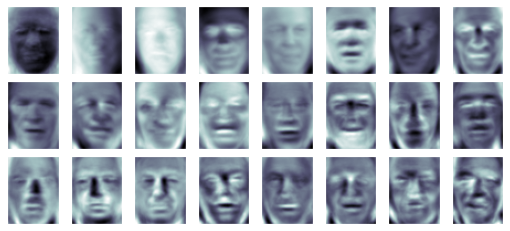

In [10]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                        subplot_kw={'xticks': [], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')